In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("D:/game/AirlinesDATA/201810k.csv")

In [3]:
df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)

In [4]:
df.OP_CARRIER.unique()

array(['United Airlines', 'Alaska Airlines', 'Endeavor Air',
       'JetBlue Airways', 'ExpressJet', 'Frontier Airlines',
       'Allegiant Air', 'Hawaiian Airlines', 'Envoy Air',
       'Spirit Airlines', 'PSA Airlines', 'SkyWest Airlines',
       'Virgin America', 'Southwest Airlines'], dtype=object)

In [5]:
df['FL_DATE'] = df['FL_DATE'].astype('str') 
df['FL_DATE'] = df['FL_DATE'].str.replace("/","")
print(df['FL_DATE'])

0        112018
1        112018
2        112018
3        112018
4        112018
          ...  
10528    112018
10529    112018
10530    112018
10531    112018
10532    112018
Name: FL_DATE, Length: 10533, dtype: object


In [6]:
df['FL_DATE'] = df['FL_DATE'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10533 entries, 0 to 10532
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FL_DATE              10533 non-null  int32  
 1   OP_CARRIER           10533 non-null  object 
 2   OP_CARRIER_FL_NUM    10533 non-null  int64  
 3   ORIGIN               10533 non-null  object 
 4   DEST                 10533 non-null  object 
 5   CRS_DEP_TIME         10533 non-null  int64  
 6   DEP_TIME             10365 non-null  float64
 7   DEP_DELAY            10349 non-null  float64
 8   TAXI_OUT             10354 non-null  float64
 9   WHEELS_OFF           10354 non-null  float64
 10  WHEELS_ON            10346 non-null  float64
 11  TAXI_IN              10346 non-null  float64
 12  CRS_ARR_TIME         10533 non-null  int64  
 13  ARR_TIME             10346 non-null  float64
 14  ARR_DELAY            10322 non-null  float64
 15  CRS_ELAPSED_TIME     10533 non-null 

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
feature_cols = ['FL_DATE',
 'OP_CARRIER',
 'OP_CARRIER_FL_NUM',
 'ORIGIN',
 'DEST',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE']

In [10]:
df['ARR_DELAY'][df['ARR_DELAY'] < 0] = 0
df['ARR_DELAY'][df['ARR_DELAY'] > 0] = 1
df['ARR_DELAY'] = df['ARR_DELAY'].astype('bool')

<ipython-input-10-4478c7a279e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ARR_DELAY'][df['ARR_DELAY'] < 0] = 0
<ipython-input-10-4478c7a279e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ARR_DELAY'][df['ARR_DELAY'] > 0] = 1


In [11]:
df['OP_CARRIER'].unique() 

array(['United Airlines', 'Alaska Airlines', 'Endeavor Air',
       'JetBlue Airways', 'ExpressJet', 'Frontier Airlines',
       'Allegiant Air', 'Hawaiian Airlines', 'Envoy Air',
       'Spirit Airlines', 'PSA Airlines', 'SkyWest Airlines',
       'Virgin America', 'Southwest Airlines'], dtype=object)

In [12]:
colsObject = ['OP_CARRIER',
 'ORIGIN',
 'DEST']

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [14]:
for col in colsObject:
    df[col] = le.fit_transform(df[col])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10533 entries, 0 to 10532
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FL_DATE              10533 non-null  int32  
 1   OP_CARRIER           10533 non-null  int32  
 2   OP_CARRIER_FL_NUM    10533 non-null  int64  
 3   ORIGIN               10533 non-null  int32  
 4   DEST                 10533 non-null  int32  
 5   CRS_DEP_TIME         10533 non-null  int64  
 6   DEP_TIME             10365 non-null  float64
 7   DEP_DELAY            10349 non-null  float64
 8   TAXI_OUT             10354 non-null  float64
 9   WHEELS_OFF           10354 non-null  float64
 10  WHEELS_ON            10346 non-null  float64
 11  TAXI_IN              10346 non-null  float64
 12  CRS_ARR_TIME         10533 non-null  int64  
 13  ARR_TIME             10346 non-null  float64
 14  ARR_DELAY            10533 non-null  bool   
 15  CRS_ELAPSED_TIME     10533 non-null 

In [16]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE
0,112018,12,2429,101,82,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,False,268,250.0,225.0,1605
1,112018,12,2427,170,282,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,False,99,83.0,65.0,414
2,112018,12,2426,293,82,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,False,134,126.0,106.0,846
3,112018,12,2425,268,225,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,False,190,182.0,157.0,1120
4,112018,12,2424,225,11,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,True,112,106.0,83.0,723


In [17]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10313 entries, 0 to 10532
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FL_DATE              10313 non-null  int32  
 1   OP_CARRIER           10313 non-null  int32  
 2   OP_CARRIER_FL_NUM    10313 non-null  int64  
 3   ORIGIN               10313 non-null  int32  
 4   DEST                 10313 non-null  int32  
 5   CRS_DEP_TIME         10313 non-null  int64  
 6   DEP_TIME             10313 non-null  float64
 7   DEP_DELAY            10313 non-null  float64
 8   TAXI_OUT             10313 non-null  float64
 9   WHEELS_OFF           10313 non-null  float64
 10  WHEELS_ON            10313 non-null  float64
 11  TAXI_IN              10313 non-null  float64
 12  CRS_ARR_TIME         10313 non-null  int64  
 13  ARR_TIME             10313 non-null  float64
 14  ARR_DELAY            10313 non-null  bool   
 15  CRS_ELAPSED_TIME     10313 non-null 

In [25]:
X = df[feature_cols]
y = df.ARR_DELAY
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model=clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [26]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.903038138332256


In [27]:
import shap

In [28]:
 # Initialize JavaScript visualizations in notebook environment
 shap.initjs()
 # Define a tree explainer for the built model
 explainer = shap.TreeExplainer(model)
 # obtain shap values for the first row of the test data
 shap_values = explainer.shap_values(X_test.iloc[0])
 shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0]) 

In [ ]:
 # obtain shap values for the test data
 shap_values = explainer.shap_values(X_test[:10])
 shap.force_plot(explainer.expected_value[0], shap_values[0], X_test[:10]) 

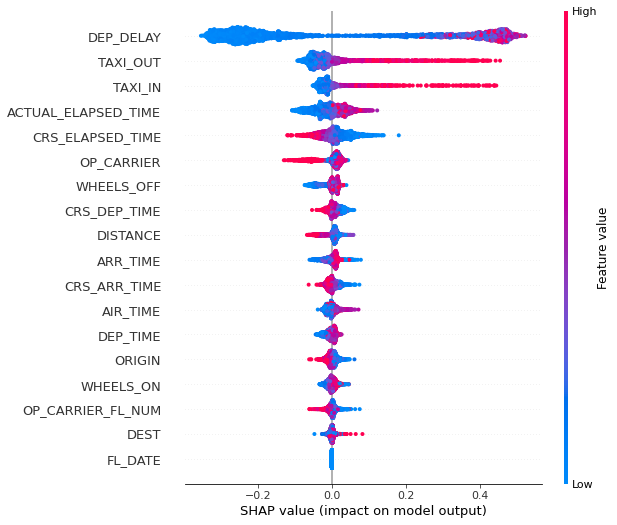

In [30]:
shap.summary_plot(shap_values[1], X_test)

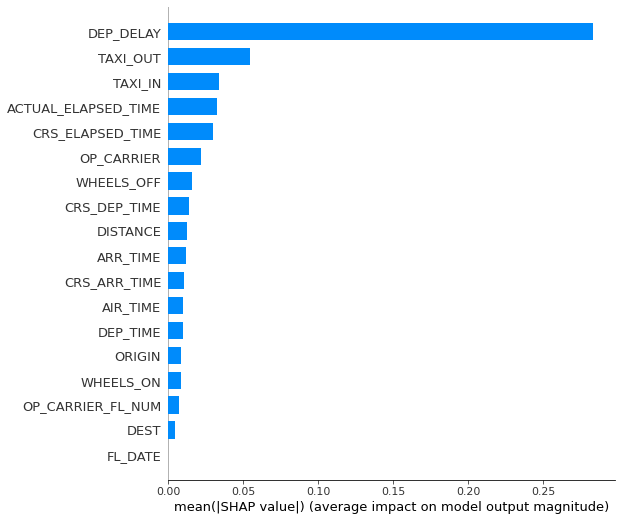

In [31]:
shap.summary_plot(shap_values[1], X_test, plot_type='bar')

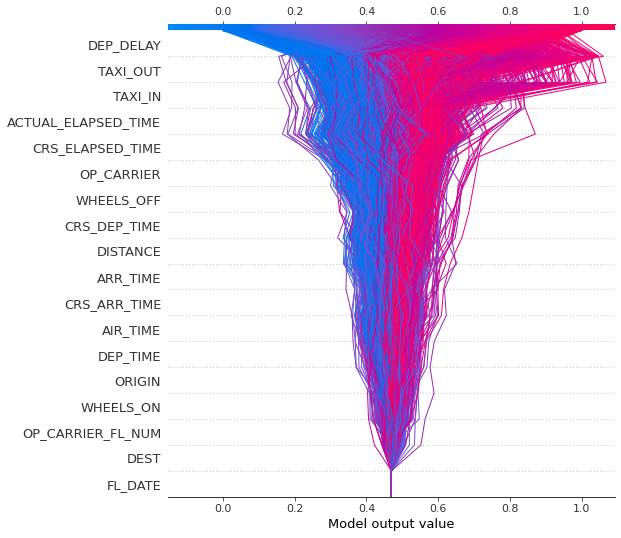

In [32]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X, ignore_warnings=True)